In [7]:
import pandas as pd
# Attempt to load the newly uploaded dataset
new_data_path = '/content/drive/MyDrive/Data Analytics 2/dataset for assignment 2.csv'

# Load the dataset to understand its structure and contents
new_data = pd.read_csv(new_data_path)

# Display the first few rows of the dataset to get an overview
new_data.head()

,User ID,Gender,Age,Activity Level,Location,App Sessions,Distance Travelled (km),Calories Burned
0,1,Female,22,Active,Suburban,151,140,728
1,2,Male,50,Active,Rural,157,115,523
2,3,Male,36,Active,Urban,178,163,795
3,4,Female,36,Active,Suburban,155,85,715
4,5,Male,34,Sedentary,Rural,95,71,439


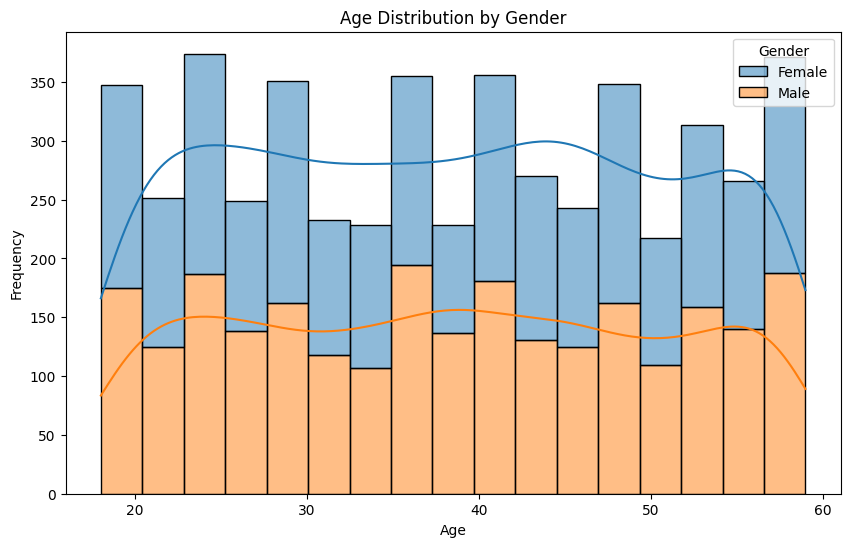

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns  # Import the seaborn module
# Assuming 'new_data' from your previous cell holds the dataset
data = new_data  # Assign the dataset to 'data'

# Age distribution by gender
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Age', hue='Gender', multiple='stack', kde=True)
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

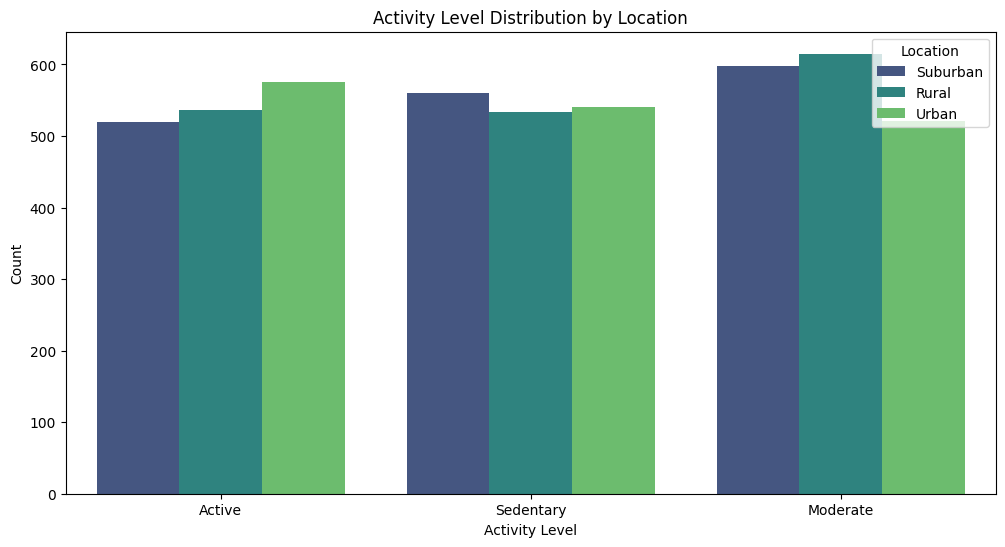

In [9]:
# Activity level distribution by location
plt.figure(figsize=(12, 6))
sns.countplot(x='Activity Level', hue='Location', data=data, palette='viridis')
plt.title('Activity Level Distribution by Location')
plt.xlabel('Activity Level')
plt.ylabel('Count')
plt.show()

<ipython-input-12-9e383e6331ca>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age Group', y='Distance Travelled (km)', data=data, palette='viridis')


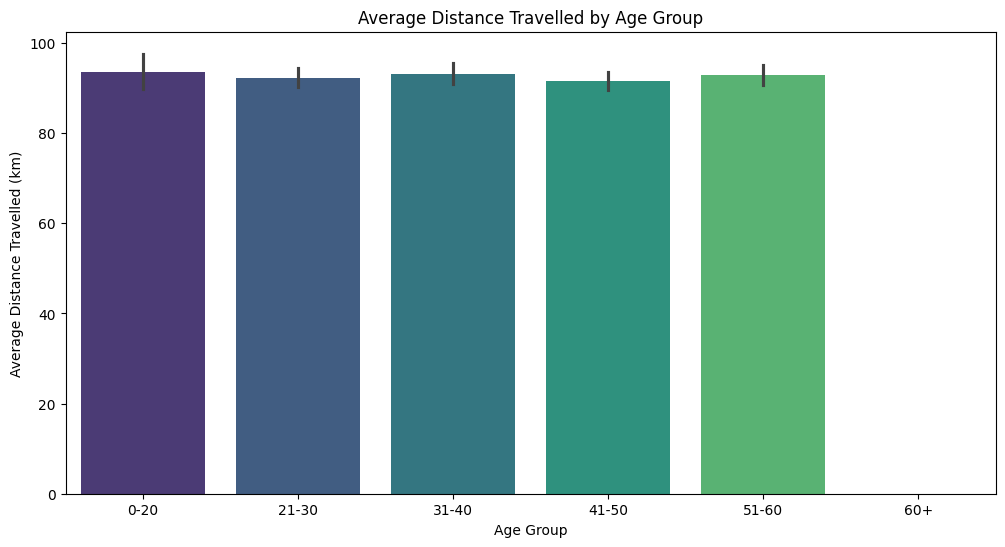

In [12]:
# Creating age groups
data['Age Group'] = pd.cut(data['Age'], bins=[0, 20, 30, 40, 50, 60, 100], labels=['0-20', '21-30', '31-40', '41-50', '51-60', '60+'])

# Average distance travelled by age group
plt.figure(figsize=(12, 6))
sns.barplot(x='Age Group', y='Distance Travelled (km)', data=data, palette='viridis')
plt.title('Average Distance Travelled by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Distance Travelled (km)')
plt.show()

In [11]:

def recommend_workout(age, gender, activity_level, location):
    if activity_level == 'Active':
        if age < 30:
            return 'HIIT or CrossFit'
        elif 30 <= age < 50:
            return 'Strength training and cardio'
        else:
            return 'Low-impact cardio and strength training'
    elif activity_level == 'Sedentary':
        if age < 30:
            return 'Beginner yoga or pilates'
        elif 30 <= age < 50:
            return 'Brisk walking and light strength training'
        else:
            return 'Gentle yoga and walking'

# Apply the recommendation function to the dataset
data['Recommended Workout'] = data.apply(lambda row: recommend_workout(row['Age'], row['Gender'], row['Activity Level'], row['Location']), axis=1)

# Display the first few rows with recommendations
data[['User ID', 'Age', 'Gender', 'Activity Level', 'Location', 'Recommended Workout']].head()


,User ID,Age,Gender,Activity Level,Location,Recommended Workout
0,1,22,Female,Active,Suburban,HIIT or CrossFit
1,2,50,Male,Active,Rural,Low-impact cardio and strength training
2,3,36,Male,Active,Urban,Strength training and cardio
3,4,36,Female,Active,Suburban,Strength training and cardio
4,5,34,Male,Sedentary,Rural,Brisk walking and light strength training
